# Noise cancellation in speech using LMS

In [1]:
# Contributors: Arindam Jati, Kuan-Wen Huang

import numpy as np
import matplotlib.pyplot as plt
import scipy.io.wavfile as wv
from scipy import signal
from lms import LMS

M = 100  # Number of filter taps in adaptive filter
step = 0.2  # LMS Step size
L = 10000 #optional argument to run with shorter signal

### Input speech - information bearing signal / data signal

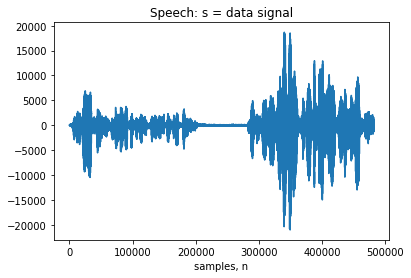

In [2]:
#Input speech - information bearing signal / data signal
s_rate, s = wv.read('obama.wav')
#s = s[:L]
# Plot
plt.figure();plt.xlabel("samples, n");
plt.title("Speech: s = data signal"); plt.plot(s)


### Let's listen to the clean speech!

### Background noise - white Gaussian or sinusoidal, high amplitude:

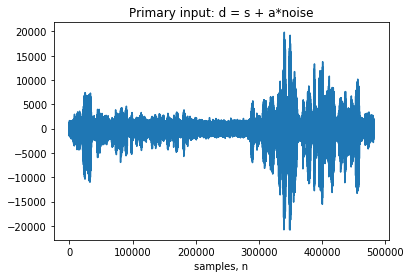

In [3]:
noise_type = "Gaussian"
# Background noise 
if noise_type == "Gaussian":
    noise = 500 * np.random.randn(len(s))
elif noise_type == "sine":
    noise = 500 * np.cos(2*np.pi*20*np.linspace(0,999,len(s))+0.6)
    
# Observed data + noise
d = s + noise 

plt.figure();plt.xlabel("samples, n");
plt.title("Primary input: d = s + a*noise"); plt.plot(d)

wv.write("obama_noisy.wav",s_rate, (d/max(d)*32767).astype('int16'))



### Let's listen to the noisy speech!

### Reference noise signal / correlated noise:

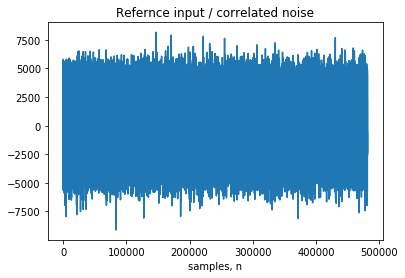

In [4]:
# Reference noise signal / correlated noise
# Different measurement of the noise, with different amplitude
corr_noise = 3.5*noise

# Less correlated noise, assume while measuring it goes through a low pass filter
#b = signal.firwin(11, 0.4)
#corr_noise = signal.lfilter(b, 1, noise)

plt.figure();plt.xlabel("samples, n"); 
plt.title("Refernce input / correlated noise"); plt.plot(corr_noise)

### LMS

In [8]:
lms = LMS(L=M, step=step)
e,y,w = lms.adapt(corr_noise, d, normalize=True)


LMS successfully adapted the weights!


array([ 2.94933941e-01,  1.05947729e-02,  1.09234201e-02,  9.10522657e-03,
        7.57507050e-03,  4.42562459e-03,  4.32393790e-03,  6.31689495e-03,
        9.77483662e-03,  1.15231831e-02,  1.25413873e-02,  1.20485960e-02,
        1.22994582e-02,  1.35653235e-02,  1.40603684e-02,  1.35050511e-02,
        1.05373706e-02,  9.14668575e-03,  6.69883610e-03,  6.49129580e-03,
        5.74699097e-03,  6.79679114e-03,  7.78836483e-03,  7.46833942e-03,
        7.60198765e-03,  7.16765703e-03,  4.13942231e-03,  2.91973362e-03,
        3.53263363e-03,  3.99450776e-03,  4.98049396e-03,  5.86895394e-03,
        6.50810424e-03,  7.47165166e-03,  7.38808257e-03,  5.11990194e-03,
        2.67311977e-03, -2.73967704e-03, -8.46375103e-03, -1.39928010e-02,
       -1.91670008e-02, -2.19904579e-02, -2.46358482e-02, -2.57160235e-02,
       -2.48007945e-02, -2.22915119e-02, -1.84893276e-02, -1.51327853e-02,
       -1.25173634e-02, -1.09558630e-02, -1.18832911e-02, -1.37922032e-02,
       -1.46191730e-02, -

### Write wav files to listen 

In [6]:
# Write wav files to listen 
wv.write('recovered.wav', s_rate, (e/max(e)*32767).astype('int16'))

### Plot output and error

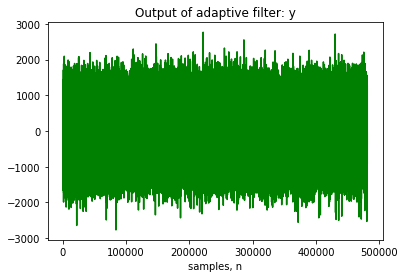

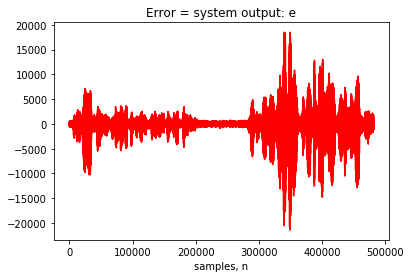

In [7]:
plt.figure();plt.xlabel("samples, n"); 
plt.title("Output of adaptive filter: y"); plt.plot(y,"g")
plt.figure();plt.xlabel("samples, n"); 
plt.title("Error = system output: e"); plt.plot(e, 'r')
plt.show()

# Now, let's listen to the (supposedly) recovered audio files